

# Project: Analysis of No Show for Medical Appointment  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information from 110527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> Brief description of the variables is provided below:
-  PatientId: Identification of a patient
-  AppointmentID: Identification of each appointment
-  Gender: Male or Female
-  ScheduledDay: What day the patient set up their appointment.
-  AppointmentDay: The day of the actual appointment, when the patient has to visit the doctor
-  Age: How old is the patient 
-  Neighbourhood: Indicates the location of the hospital.
-  Scholarship: 0 or 1; 1 indicates that the patient is in the Bolsa Familia program
-  Hipertension: 0 or 1; 1 indicates that the patient has hipertension
-  Diabetes: 0 or 1; 1 indicates that the patient has diabetes
-  Alcoholism: 0 or 1; 1 indicates that the patient has problem of alcoholism
-  Handcap: 0 0r 1; 1 indicates that the patient is handicapped
-  SMS_received: 0 or 1; 1 indicates that a SMS was received 
-  No_show "No" indicates that the patient showed up to their appointment and "Yes" that the patient didn't show up for the appointment 

> In this project, we will investigate this dataset and answer the following questions:
- 1. Is the proportion of No Shows significantly less for appointments booked on the same day?
- 2. Does the rate of no show vary according to age group?
- 3. Do certain neighbourhoods have higher number of no shows than others? Which are the top 5 neighbourhoods for no shows?
- 4. Does the day of the week of the appointment influences the patient not showing up for the appointment?
- 5. Does the no_show rate increase as lag increases?
- 6. Understand what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#####  No_show variable is the dependent variable and the other variables are independent variables




### Before loading the data, open the csv file in MS Excel and change the "No-show" variable name to "No_show" to maintain consistency in variable names 

### We will be extracting the date from the ScheduledDay column and AppointmentDay column. 
#### -  Insert three columns before Age. 
#### -  In cell F1, type column name ScheduledDayDate
#### -  In cell F2, type the formula =left(D2,10). Copy and paste the formula for all the cells in that column. This will extract the date portion from the ScheduledDay column. 
#### -  In cell G1, type column name AppointmentDayDate
#### -  In cell G2, type the formula =left(E2,10). Copy and paste the formula for all the cells in that column. This will extract the date portion from the AppointmentDay column.
#### - In cell H1, type column name sameDayOrBefore
#### - In cell H2, type formula =if(G2=F2,"Same Day", if(G2<F2, "Booked before", "Investigate")) With this we can find out which appointments were scheduled before the AppointmentDay and which were scheduled on the same day. 


<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

> We will import various data analysis and data visualization libraries, 
> load the data, 
> and check the first few rows of the data to check that the data has been read in correctly

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,ScheduledDayDate,AppointmentDayDate,SameOrBefore,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Check the number of rows and columns in the data and also the datatypes of the different variables

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
PatientId             110527 non-null float64
AppointmentID         110527 non-null int64
Gender                110527 non-null object
ScheduledDay          110527 non-null object
AppointmentDay        110527 non-null object
ScheduledDayDate      110527 non-null object
AppointmentDayDate    110527 non-null object
SameOrBefore          110527 non-null object
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hipertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handcap               110527 non-null int64
SMS_received          110527 non-null int64
No_show               110527 non-null object
dtypes: float64(1), int64(8), object(8)
memory usage: 14.3+ MB


### Check the variables descriptive statistics

In [116]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

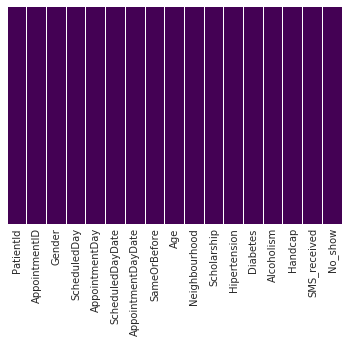

In [117]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

There is no missing data in any of the columns. Let us continue checking the data for duplicate records, outliers and if datatypes are correct.

### Check for duplicate records 

In [118]:
# Checking for duplicate records
sum(df.duplicated())

0

In [119]:
# Checking for patient IDs that have 
sum(df['PatientId'].duplicated())

48783

##### Analysis: No duplicate records in the dataset. 48783 PatientIds have more than one appointments

### Exploring the variables

#### Variable: Gender

In [120]:
print('Gender unique values are') 

print(df['Gender'].unique())

Gender unique values are
['F' 'M']


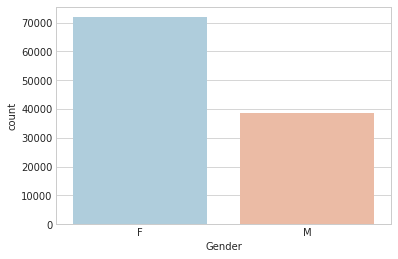

In [121]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,palette='RdBu_r');

##### Analysis : There are more females than males in the dataset

#### Variable: ScheduledDay and AppointmentDay

In [122]:
# Checkin the datatype of ScheduledDay and AppointmentDay

print(type(df['ScheduledDay'].iloc[0]))
print(type(df['AppointmentDay'].iloc[0]))


<class 'str'>
<class 'str'>


In [123]:
# Checking the distribution of appointments booked on the same day or those that are booked before or after

df['SameOrBefore'].value_counts()

booked before    71959
Same Day         38563
investigate          5
Name: SameOrBefore, dtype: int64

##### Analysis: Convert ScheduledDay and AppointmentDay to datetime datatype. Delete 5 records where ScheduledDay is after the AppointmentDay

#### Variable: Age

In [124]:
# Checking the distribution of values in Age column
print('Age distribution is') 

df['Age'].describe()

Age distribution is


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

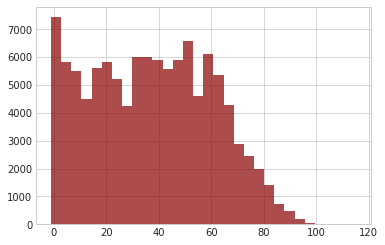

In [125]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7);

In [126]:
# Finding 1st percentile and 99th percentile values 
print(np.percentile(df['Age'], 1))
print(np.percentile(df['Age'],99))

0.0
86.0


In [127]:
# Finding the count of patients where age is greater than or equal to 100
df[df['Age']>=100]['PatientId'].count()

11

In [128]:
# Finding the count of patients where age is greater than 99th percentile value
df[df['Age']>86]['PatientId'].count()

900

##### Analysis: The Age variable seems to be skewed to the right. 75th percentile is 55 and maximum is 115.

#### Variable: Scholarship

In [129]:
print('Scholarship unique values are')
print(df['Scholarship'].unique())
print('\n')

Scholarship unique values are
[0 1]




In [130]:
# Analyzing Scholarship and No_show variable together
df.groupby(['No_show','Scholarship'])['Scholarship'].count()

No_show  Scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
Name: Scholarship, dtype: int64

#### Variable: Hipertension

In [131]:
print('Hipertension unique values are')
print(df['Hipertension'].unique())
print('\n')

Hipertension unique values are
[1 0]




In [132]:
# Analyzing Hipertension and No_show variable together

df.groupby(['No_show','Hipertension'])['Hipertension'].count()

No_show  Hipertension
No       0               70179
         1               18029
Yes      0               18547
         1                3772
Name: Hipertension, dtype: int64

#### Variable: Diabetes

In [133]:
print('Diabetes unique values are')
print(df['Diabetes'].unique())
print('\n')

Diabetes unique values are
[0 1]




In [134]:
# Analyzing Diabetes and No_show variable together
df.groupby(['No_show','Diabetes'])['Diabetes'].count()

No_show  Diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
Name: Diabetes, dtype: int64

#### Variable: Alcoholism

In [135]:
print('Alcoholism unique values are')
print(df['Alcoholism'].unique())
print('\n')

Alcoholism unique values are
[0 1]




In [136]:
# Analyzing Alcoholism and No_show variable together
df.groupby(['No_show','Alcoholism'])['Alcoholism'].count()

No_show  Alcoholism
No       0             85525
         1              2683
Yes      0             21642
         1               677
Name: Alcoholism, dtype: int64

#### Variable: Handcap

In [137]:
print('Handicap unique values are')
print(df['Handcap'].unique())
print('\n')

Handicap unique values are
[0 1 2 3 4]




In [138]:
# Analyzing Handcap and No_show variable together
df.groupby(['No_show','Handcap'])['Handcap'].count()

No_show  Handcap
No       0          86374
         1           1676
         2            146
         3             10
         4              2
Yes      0          21912
         1            366
         2             37
         3              3
         4              1
Name: Handcap, dtype: int64

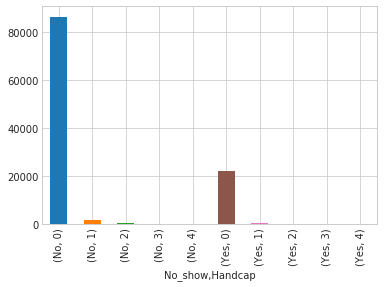

In [139]:
df.groupby(['No_show','Handcap'])['Handcap'].count().plot(kind='bar');

#### Variable: SMS_received

In [140]:
print('SMS_received unique values are')
print(df['SMS_received'].unique())

SMS_received unique values are
[0 1]


In [141]:
# Analyzing SMS_received and No_show variable together
df.groupby(['No_show','SMS_received'])['Handcap'].count()

No_show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: Handcap, dtype: int64

#### Variable: Neighbourhood

In [142]:
# No. of unique values in Neighbourhood column
df['Neighbourhood'].nunique()

81

#### Variable: No_show

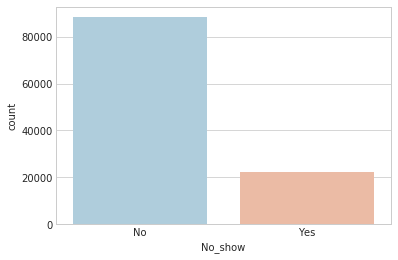

In [143]:
sns.set_style('whitegrid')
sns.countplot(x='No_show',data=df,palette='RdBu_r');

In [144]:
# Calculating the rate of No_show in the dataset
df[df['No_show']=="Yes"]['PatientId'].count()/(df.count())

PatientId             0.201933
AppointmentID         0.201933
Gender                0.201933
ScheduledDay          0.201933
AppointmentDay        0.201933
ScheduledDayDate      0.201933
AppointmentDayDate    0.201933
SameOrBefore          0.201933
Age                   0.201933
Neighbourhood         0.201933
Scholarship           0.201933
Hipertension          0.201933
Diabetes              0.201933
Alcoholism            0.201933
Handcap               0.201933
SMS_received          0.201933
No_show               0.201933
dtype: float64

In [145]:
# # Analyzing Gender and No_show variable together
df.groupby(['No_show','Gender'])['Gender'].count()

No_show  Gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

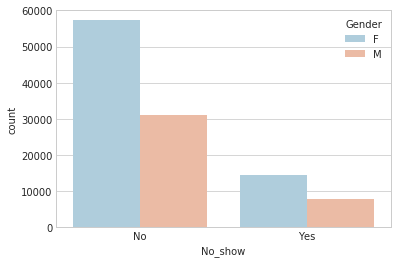

In [146]:
sns.set_style('whitegrid')
sns.countplot(x='No_show',hue='Gender',data=df,palette='RdBu_r');

##### Analysis: In this dataset no_show rate is 20% ; among the no shows also females are almost twice in number as compared to males

### Initial observations about the data

##### - There are 110527 rows and 17 columns 

##### - There are no missing values in any column

##### - PatientID is of float64 datatype, so we should change it  to string type so that it is not used as a numerical variable in the model

##### -There are 48783 PatientIDs that have more than one appointment 

##### - AppointmentID is of int64 datatype. But we will not be able to use it for analysis. So we will drop that column

##### - There are 5 rows with value 'investigate' in SameOrBefore column. In these rows ScheduledDay is after the AppointmentDay which does not make sense. So we will delete those rows

##### - Age variable has a negative value which is not possible. There is one such record. We wil drop that record.

##### - There are 11 PatientIds where age is greater than or equal to 100

##### - ScheduledDay and AppointmentDay are of string datatype. We will convert them to datetime datatype

##### -  We will create a new variable called 'lag' which is the difference between appointment_day_date and scheduled_day_date

##### - Neighbourhood column has 81 unique values 

##### -  Handicap has values [0,1,2,3,4]. So we can make dummy variables for this variable

##### -  No_show column has values "No" and "Yes". We will replace "Yes" with 1 and "No" with 0 so that it can be used in logistic regression

##### - The remaining datatypes look to be correct

### Data Cleaning and Feature Engineering

In [147]:
# renaming all columns to simpler names for our exploration
df.rename(columns={'PatientId': 'patient_id', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'ScheduledDayDate':'scheduled_day_date','AppointmentDayDate':'appointment_day_date', 'SameOrBefore':'sameOrBefore','SMS_received': 'sms_received', 'No-show': 'no_show', 'Handcap': 'handicap' }, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)
df.columns

Index(['patient_id', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'scheduled_day_date', 'appointment_day_date',
       'sameorbefore', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [148]:
# formatting the patient_id column as string
df.patient_id = df.patient_id.apply(lambda patient: str(int(patient)))

In [149]:
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])

In [150]:
df.columns

Index(['patient_id', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'scheduled_day_date', 'appointment_day_date',
       'sameorbefore', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [151]:
df.drop('appointmentid', axis =1, inplace=True)

In [152]:
# Identifying records where scheduled_day is after the appointment_day
i = df[df['sameorbefore']=='investigate'].index
i

Int64Index([27033, 55226, 64175, 71533, 72362], dtype='int64')

In [153]:
# deleting records where scheduled_day is after the appointment_day
df.drop(i, inplace=True)

In [154]:
# Locating the rows where the age value is negative
j = df[df['age']<0].index
j

Int64Index([99832], dtype='int64')

In [155]:
# Deleting those rows where age value is negative
df.drop(j, inplace = True)

In [156]:
# Checking that no more negative values are present in the Age column
df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [157]:
# Checking how many rows have value of 0 in Age column
df[df['age']==0]['age'].count()

3539

##### - We will assume that if the Age value is 0, then that appoinment is for an infant who has not completed 1 year of age yet.

In [158]:
# Checking the distribution of values in age column for creating bins

df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [159]:
#Bin edges that will be used to "cut" the data into groups
bin_edges = [ 0,20,40,65,115]

In [160]:
# Labels for the four age groups
bin_names = ['Youth', 'Adult', 'Middle_Aged', 'Senior']

In [161]:
# Creating age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [162]:
# Checking for successful creation of this column
df.head()

,patient_id,gender,scheduled_day,appointment_day,scheduled_day_date,appointment_day_date,sameorbefore,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,29872500000000,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Middle_Aged
1,558998000000000,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle_Aged
2,4262960000000,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,62,MATA DA PRAIA,0,0,0,0,0,0,No,Middle_Aged
3,867951000000,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Youth
4,8841190000000,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,2016-04-29,2016-04-29,Same Day,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle_Aged


In [163]:
# Replacing 'Yes' with 1 and 'No' with 0 in the no_show column

df['no_show'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [164]:
# Check that the replacement has been done correctly
df['no_show'].unique()

array([0, 1])

In [165]:
from datetime import datetime

#Converting appointment_day_date and scheduled_day_date to datetime datatype
df['appointment_day_date1']=pd.to_datetime(df['appointment_day_date'], format = '%Y-%m-%d')
df['scheduled_day_date1']=pd.to_datetime(df['scheduled_day_date'], format='%Y-%m-%d')

#Dropping columns appointment_day_date and scheduled_day_date
df.drop(['appointment_day_date', 'scheduled_day_date'], axis=1, inplace=True)

#Renaming appointment_day_date1 and scheduled_day_date1
df=df.rename(columns = {'appointment_day_date1':'appointment_day_date','scheduled_day_date1':'scheduled_day_date'})

# Creating new column named lag for number of days between appointment_day_date and scheduled_day_date
df['lag']=df['appointment_day_date']-df['scheduled_day_date']



In [166]:
df['lag'].describe()


count                     110521
mean     10 days 04:25:27.412889
std      15 days 06:07:25.262183
min              0 days 00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: lag, dtype: object

In [167]:
df['lag'] = df['lag'].abs()
df['lag'].head(10)

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
5   2 days
6   2 days
7   2 days
8   0 days
9   2 days
Name: lag, dtype: timedelta64[ns]

In [168]:
# extracting integer portion from the timedelta datatype
df['lag']=df['lag'].astype('timedelta64[D]')

In [169]:
# Checking datatype of lag variable
df['lag'].dtype

dtype('float64')

In [170]:
# Converting lag to int datatype
df['lag'] = df['lag'].astype(int)

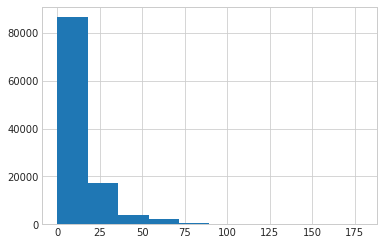

In [171]:
df['lag'].hist();

In [172]:
df['lag'].describe()


count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lag, dtype: float64

In [173]:
# Creating bins for lag variable

bin_edges = [0,4,15,179]
bin_names = ['low', 'medium', 'high']
df['lag_group'] = pd.cut(df['lag'], bin_edges, labels=bin_names)


In [174]:
# Checking the count of no_shows for each lag_group
df.groupby(['no_show','lag_group'])['patient_id'].count()

no_show  lag_group
0        low          15375
         medium       18400
         high         17662
1        low           4590
         medium        7348
         high          8584
Name: patient_id, dtype: int64

In [175]:
# Extracting day of week from appointment_day_date

df['appointment_weekday'] = df['appointment_day_date'].apply(lambda day: day.dayofweek)
df.appointment_weekday.head()

0    4
1    4
2    4
3    4
4    4
Name: appointment_weekday, dtype: int64

In [176]:
# Checking what are the final columns in the dataset
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day',
       'sameorbefore', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show',
       'age_group', 'appointment_day_date', 'scheduled_day_date', 'lag',
       'lag_group', 'appointment_weekday'],
      dtype='object')

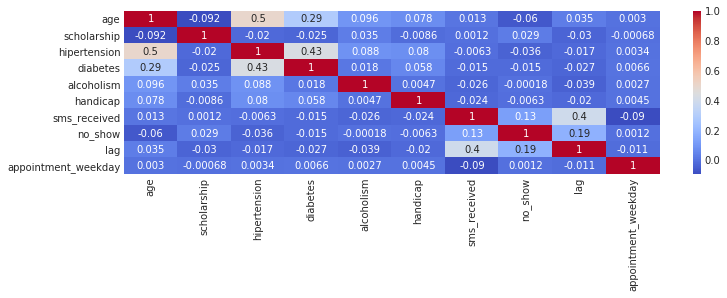

In [177]:
# Checking the correlation between all the numerical variables in the dataset

plt.figure(figsize=(12,3))
sns.heatmap(data=df.corr(),cmap='coolwarm', annot=True);

##### There is some correlation between lag and no_show
##### There is also some correlation between lag and sms_received
###### There is strong correlation between age and hipertension and diabetes
##### There is also strong correlation between diabetes and hipertension

In [178]:
# Performing final check on the dataset
df.head()

,patient_id,gender,scheduled_day,appointment_day,sameorbefore,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group,appointment_day_date,scheduled_day_date,lag,lag_group,appointment_weekday
0,29872500000000,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,Same Day,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Middle_Aged,2016-04-29,2016-04-29,0,NaN,4
1,558998000000000,M,2016-04-29 16:08:27,2016-04-29T00:00:00Z,Same Day,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Middle_Aged,2016-04-29,2016-04-29,0,NaN,4
2,4262960000000,F,2016-04-29 16:19:04,2016-04-29T00:00:00Z,Same Day,62,MATA DA PRAIA,0,0,0,0,0,0,0,Middle_Aged,2016-04-29,2016-04-29,0,NaN,4
3,867951000000,F,2016-04-29 17:29:31,2016-04-29T00:00:00Z,Same Day,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Youth,2016-04-29,2016-04-29,0,NaN,4
4,8841190000000,F,2016-04-29 16:07:23,2016-04-29T00:00:00Z,Same Day,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Middle_Aged,2016-04-29,2016-04-29,0,NaN,4


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is the proportion of No Shows significantly less for appointments booked on the same day?

In [179]:
df.groupby('no_show')['sameorbefore'].value_counts()

no_show  sameorbefore 
0        booked before    51437
         Same Day         36770
1        booked before    20522
         Same Day          1792
Name: sameorbefore, dtype: int64

In [180]:
# Percentage of now shows for appointments booked on the same day

print(round(1792/(1792+20522),2))

0.08


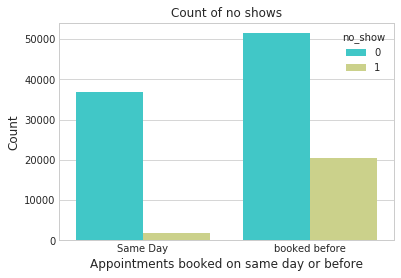

In [181]:
figsize = (12,10)
sns.countplot('sameorbefore', data=df, hue = 'no_show', palette='rainbow')
plt.title('Count of no shows')
plt.xlabel('Appointments booked on same day or before', fontsize = 12)
plt.ylabel('Count',fontsize = 12);

##### Out of 22314 no shows, 8% appointments were scheduled on the same day and 92% appointments were scheduled before the appointment date. So there are chances that patients might forget and therefore not show up for the appointment

### Research Question 2 : Does the rate of no show vary according to age group?

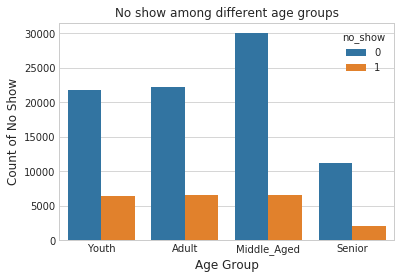

In [182]:
sns.countplot(df['age_group'], hue=df['no_show'])
plt.title('No show among different age groups')
plt.xlabel('Age Group', fontsize =12)
plt.ylabel('Count of No Show', fontsize=12);

In [183]:
count_age_group=df.groupby('age_group')['patient_id'].count()
count_age_group

age_group
Youth          28307
Adult          28833
Middle_Aged    36542
Senior         13300
Name: patient_id, dtype: int64

In [184]:
df.groupby(['age_group','no_show'])['patient_id'].count()

age_group    no_show
Youth        0          21852
             1           6455
Adult        0          22209
             1           6624
Middle_Aged  0          30011
             1           6531
Senior       0          11235
             1           2065
Name: patient_id, dtype: int64

In [185]:
Youth_no_show_rate = round(6455/28307,2)
Adult_no_show_rate = round(6624/28833,2)
Middle_Aged_no_show_rate = round(6531/36542,2)
Senior_no_show_rate = round(2065/13300,2)

print(Youth_no_show_rate)
print(Adult_no_show_rate)
print(Middle_Aged_no_show_rate)
print(Senior_no_show_rate)

0.23
0.23
0.18
0.16


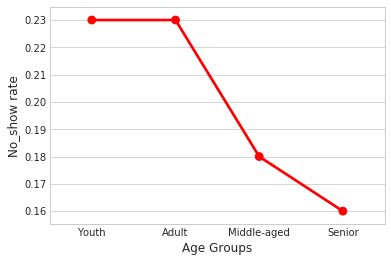

In [186]:
y=[Youth_no_show_rate,Adult_no_show_rate,Middle_Aged_no_show_rate,Senior_no_show_rate]

x=['Youth','Adult','Middle-aged','Senior']

sns.pointplot(x=x, y=y, color='r')
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('No_show rate', fontsize =12);

##### As age increases the rate of no show decreases

### Research Question 3:  What are the top 5 neighbourhoods that have highest number of no shows

In [187]:
df['neighbourhood'].value_counts().head()

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4430
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: neighbourhood, dtype: int64

In [188]:
k = pd.DataFrame(df.groupby('neighbourhood')['no_show'].count().sort_values(ascending = False).head())
k

,no_show
neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4430
JARDIM DA PENHA,3877
ITARARÉ,3514


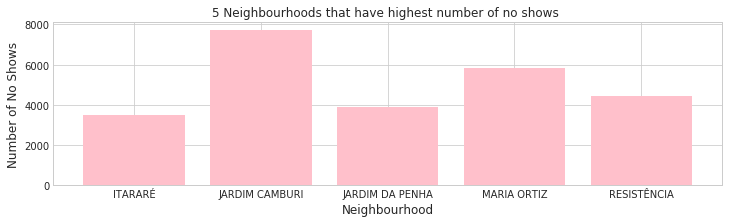

In [189]:
plt.figure(figsize=(12,3))
plt.bar(["JARDIM CAMBURI", "MARIA ORTIZ", "RESISTÊNCIA", "JARDIM DA PENHA", "ITARARÉ"], k['no_show'], color='pink')
plt.title("5 Neighbourhoods that have highest number of no shows ", fontsize =12)
plt.xlabel("Neighbourhood", fontsize =12)
plt.ylabel("Number of No Shows", fontsize=12);

### Research Question 4: Does the no_show rate vary for the day of the week

In [190]:
df.groupby(['no_show', 'appointment_weekday'])['patient_id'].count()

no_show  appointment_weekday
0        0                      18024
         1                      20488
         2                      20774
         3                      13909
         4                      14982
         5                         30
1        0                       4689
         1                       5150
         2                       5092
         3                       3337
         4                       4037
         5                          9
Name: patient_id, dtype: int64

In [191]:
# Checking the no_show rate for different weekdays

# weekday =0 
(df[(df['no_show']==1) & (df['appointment_weekday']==0)]['patient_id'].count())/df[df['no_show']==1]['patient_id'].count()

# Rounded value 0.210137


0.21013713363807476

In [192]:
# weekday =1 
(df[(df['no_show']==1) & (df['appointment_weekday']==1)]['patient_id'].count())/df[df['no_show']==1]['patient_id'].count()
# Rounded value 0.230797

0.23079680917809448

In [193]:
# weekday =2
(df[(df['no_show']==1) & (df['appointment_weekday']==2)]['patient_id'].count())/df[df['no_show']==1]['patient_id'].count()
# Rounded value 0.228198

0.22819754414269069

In [194]:
# weekday =3
(df[(df['no_show']==1) & (df['appointment_weekday']==3)]['patient_id'].count())/df[df['no_show']==1]['patient_id'].count()

# Rounded value 0.149547

0.14954736936452451

In [195]:
# weekday =4
(df[(df['no_show']==1) & (df['appointment_weekday']==4)]['patient_id'].count())/df[df['no_show']==1]['patient_id'].count()

# Rounded value 0.180918

0.18091780944698396

In [196]:
# weekday =5
(df[(df['no_show']==1) & (df['appointment_weekday']==5)]['patient_id'].count())/df[df['no_show']==1]['patient_id'].count()

#Rounded value  0.000403

0.00040333422963162143

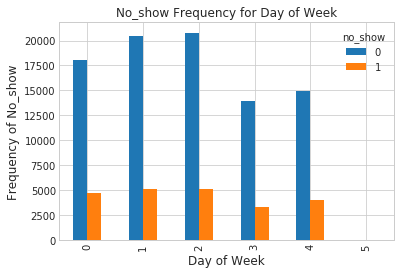

In [197]:
pd.crosstab(df['appointment_weekday'],df['no_show']).plot(kind='bar')
plt.title('No_show Frequency for Day of Week', fontsize =12)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Frequency of No_show', fontsize =12);


##### The rate of no_show differs for different day of week. 

- 0.21 for Monday (weekday =0), 
- 0.23 for Tuesday (weekday =1), 
- 0.23 for Wednesday (weekday =2),
- 0.15 for Thursday (weekday=3),
- 0.18 for Friday (weekday = 4) and
- 0.00 for Saturday (weekday=5)

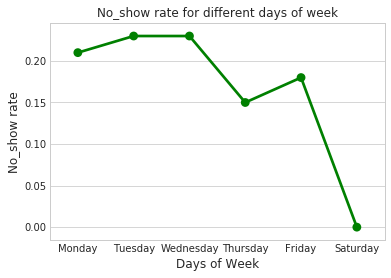

In [198]:

x=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday']
y=[0.21,0.23,0.23,0.15,0.18,0]
sns.pointplot(x=x, y=y, color='g')
plt.xlabel('Days of Week', fontsize =12)
plt.ylabel('No_show rate', fontsize =12)
plt.title('No_show rate for different days of week', fontsize =12);

##### The no_show rate differs across the days of the week. It is lower on Thursday, Friday and Saturday

### Research Question 5: Does the no_show rate increase as lag increases

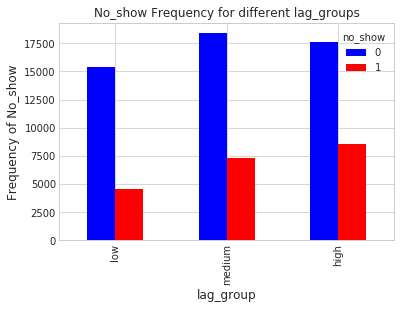

In [199]:
colors=['b','r']
pd.crosstab(df['lag_group'],df['no_show']).plot(kind='bar', color=colors)
plt.title('No_show Frequency for different lag_groups', fontsize =12)
plt.xlabel('lag_group', fontsize=12)
plt.ylabel('Frequency of No_show', fontsize =12);

##### As the lag (no of days between scheduled_day and appointment_day) increases, the rate of no_show also increases

### Research Question 6: Understand what factors are important predictors of no show

### Logistic Regression

In [200]:
df1 = df.copy()

In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 20 columns):
patient_id              110521 non-null object
gender                  110521 non-null object
scheduled_day           110521 non-null datetime64[ns]
appointment_day         110521 non-null object
sameorbefore            110521 non-null object
age                     110521 non-null int64
neighbourhood           110521 non-null object
scholarship             110521 non-null int64
hipertension            110521 non-null int64
diabetes                110521 non-null int64
alcoholism              110521 non-null int64
handicap                110521 non-null int64
sms_received            110521 non-null int64
no_show                 110521 non-null int64
age_group               106982 non-null category
appointment_day_date    110521 non-null datetime64[ns]
scheduled_day_date      110521 non-null datetime64[ns]
lag                     110521 non-null int64
lag_group               71

Steps:
    1. Convert categorical variables to dummy variables
    2. Drop variables that cannot be used in the model
    3. Drop the variables for which dummy variables are created
    4. Concat the new dummy variables with the old dataset
    5. Import the required libraries
    6. Build the model
    7. Evaluate the performance of the model using Confusion Matrix, Classification Table, ROC 
    8. Run iterations as required
    9. Draw conclusions from finalized iteration

In [202]:
# Convert categorical variables to dummy variables
sex = pd.get_dummies(df1['gender'],drop_first=True)
sameOrBefore = pd.get_dummies(df1['sameorbefore'],drop_first=True)
agegroup = pd.get_dummies(df1['age_group'],drop_first=True)
laggroup = pd.get_dummies(df1['lag_group'], drop_first=True)
appointment_week_day = pd.get_dummies(df1['appointment_weekday'], drop_first=True)

In [203]:
# Drop the variables for which dummy variables are created
df1.drop(['gender','sameorbefore','age_group','lag_group','appointment_weekday'],axis=1,inplace=True)

In [204]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
patient_id              110521 non-null object
scheduled_day           110521 non-null datetime64[ns]
appointment_day         110521 non-null object
age                     110521 non-null int64
neighbourhood           110521 non-null object
scholarship             110521 non-null int64
hipertension            110521 non-null int64
diabetes                110521 non-null int64
alcoholism              110521 non-null int64
handicap                110521 non-null int64
sms_received            110521 non-null int64
no_show                 110521 non-null int64
appointment_day_date    110521 non-null datetime64[ns]
scheduled_day_date      110521 non-null datetime64[ns]
lag                     110521 non-null int64
dtypes: datetime64[ns](3), int64(9), object(3)
memory usage: 13.5+ MB


In [205]:
# Drop variables that cannot be used in the model
df1.drop(['patient_id', 'scheduled_day','appointment_day','age','neighbourhood','appointment_day_date','scheduled_day_date','lag'], axis=1, inplace=True)

In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 7 columns):
scholarship     110521 non-null int64
hipertension    110521 non-null int64
diabetes        110521 non-null int64
alcoholism      110521 non-null int64
handicap        110521 non-null int64
sms_received    110521 non-null int64
no_show         110521 non-null int64
dtypes: int64(7)
memory usage: 6.7 MB


In [207]:
#  Concat the new dummy variables with the old dataset
df1 = pd.concat([df1,sex,sameOrBefore,agegroup, laggroup,appointment_week_day],axis=1)

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 19 columns):
scholarship      110521 non-null int64
hipertension     110521 non-null int64
diabetes         110521 non-null int64
alcoholism       110521 non-null int64
handicap         110521 non-null int64
sms_received     110521 non-null int64
no_show          110521 non-null int64
M                110521 non-null uint8
booked before    110521 non-null uint8
Adult            110521 non-null uint8
Middle_Aged      110521 non-null uint8
Senior           110521 non-null uint8
medium           110521 non-null uint8
high             110521 non-null uint8
1                110521 non-null uint8
2                110521 non-null uint8
3                110521 non-null uint8
4                110521 non-null uint8
5                110521 non-null uint8
dtypes: int64(7), uint8(12)
memory usage: 8.0 MB


In [209]:
df1.head(1)

,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,M,booked before,Adult,Middle_Aged,Senior,medium,high,1,2,3,4,5
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


##### - All the variables in the dataset are ready for building the model

#### Now we will split the data in train and test using scikit learn 

In [210]:
# Assigning x and y variables
X=df1.drop('no_show', axis=1)
y= df1['no_show']

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, 
                                                    random_state=101)

So we have split the dataset into 30% for test and 70% for train. random_state ensures that results can be replicated. 

# Now next step is to train and predict by creating a model.

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [214]:
# we create an instance of a logistic regression model

In [215]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Recursive Feature Elimination
> Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

> Referenced from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [216]:
rfe = RFE(logmodel, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [217]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498092
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.010      
Dependent Variable: no_show          AIC:              110135.1548
Date:               2019-04-16 06:18 BIC:              110308.1881
No. Observations:   110521           Log-Likelihood:   -55050.    
Df Model:           17               LL-Null:          -55595.    
Df Residuals:       110503           LLR p-value:      4.9037e-221
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
scholarship       -0.2081   0.0251  -8.3023 0.0000 -0.2572 -0.1589
hipertension      -0.0396   0.0255  -1.5546 0.1200 -0

    Some of the variables are insignificant. So we will run another iteration by excluding those variables

In [218]:
cols= ['scholarship','diabetes','alcoholism','sms_received','M','booked before', 'Adult','Middle_Aged','Senior','medium','high',1,2,3,4]

In [219]:
X=df1[cols]

In [220]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498116
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.010      
Dependent Variable: no_show          AIC:              110134.5601
Date:               2019-04-16 06:18 BIC:              110278.7545
No. Observations:   110521           Log-Likelihood:   -55052.    
Df Model:           14               LL-Null:          -55595.    
Df Residuals:       110506           LLR p-value:      1.0849e-222
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
scholarship       -0.2097   0.0250  -8.3742 0.0000 -0.2588 -0.1606
diabetes           0.0859   0.0329   2.6074 0.0091  0

# All the variables are now significant

### Logistic Regression Model Fitting

In [221]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we will call some predictions off of this using X_test dataset. then let's move on to evaluate our model!

In [222]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [223]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[26467     2]
 [ 6688     0]]


## The result is telling us that we have 26467+0 correct predictions and 6688+2 incorrect predictions.

### Compute precision, recall, F-measure and support

> - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

>- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

>-  The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

>-  The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

>- The support is the number of occurrences of each class in y_test.

> Referenced from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [224]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89     26469
          1       0.00      0.00      0.00      6688

avg / total       0.64      0.80      0.71     33157



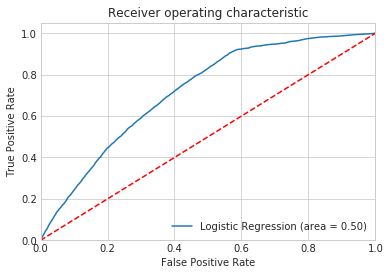

In [225]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

# Code referenced from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

## The receiver operating characteristic (ROC) curve is a tool used with binary classifiers to ascertain how good the model is. The dotted line represents the ROC curve if we had a random model; the more the gap between red dotted line and blue solid line, the better the model

## This model is a fairly good model

<a id='conclusions'></a>
# Conclusions

### As shown in the logistic regression, the variables that are significant predictors of no show are
- 'scholarship': has negative coefficient
- 'diabetes',
- 'alcoholism',
- 'sms_received': has negative coefficient which means that if SMS was received by the patient then he/she will most likely show up for the appointment
- if the gender is male. It has negative coefficient which means that males generally show up for the appointment 
- if the appointment has been booked before,
- 'Adult','Middle_Aged','Senior': have negative coeffients. As age increases, no_show rate decreases
- 'medium','high': have positive coefficients. As lag increases, no_show rate increases
- 1,2,3,4 for handicap variable have negative coefficients

### - The rate of no_show varies for the day of week of the appointment date. It is generally lower on Thursday, Friday and Saturday. Appointments closer to weekend have higher chances of patient showing up.

### The no_show rate varies across different age groups. It is lower for patients in Senior age group. 

### The no_show rate varies for the lag period also. It increases from low to medium to high lag groups.### - The proportion of No Shows is significantly less for appointments booked on the same day. Out of 22314 no shows, 8% appointments were scheduled on the same day and 92% appointments were scheduled before the appointment date. So there are higher chances that patients might forget and therefore not show up for the appointment

### - Jardim Camburi, Maria Ortiz, Resistência, Jardim Da Penha, Itararé are the top 5 neighbourhoods for no_show



## Resources used 

1. www.stackoverflow.com
2. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
3. https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/lecture


In [226]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0